<a href="https://colab.research.google.com/github/akankshaj-8799/Final-Year-Project/blob/main/Analysis_of_Worldwide_covid_19_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

In [ ]:
#Path of the raw dataset
path = 'https://raw.githubusercontent.com/akankshaj-8799/Final-Year-Project/refs/heads/main/worldwide_covid-19.csv'

In [ ]:
#reading the dataset using pandas and displaying the top 5 dataset
df = pd.read_csv(path)
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
df.shape

(161568, 5)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.isnull().sum()

,0
Date,0
Country,0
Confirmed,0
Recovered,0
Deaths,0


In [ ]:
#Checking the information of the data in the datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [ ]:
#coverting data into date-time format
df = pd.read_csv(path,parse_dates=['Date'],dayfirst = True)
df.head()

<ipython-input-8-acae0be012e6>:2: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv(path,parse_dates=['Date'],dayfirst = True)


,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [ ]:
# again checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [ ]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462
161567,2022-04-16,Zimbabwe,247237,0,5462


In [ ]:
#checking for the date of the latest present data
today = df['Date'].max()
today

Timestamp('2022-04-16 00:00:00')

In [ ]:
#current date
today = df[df.Date == '2021-06-27']

In [ ]:
#adding new column Active by calculating active
active = df['Confirmed'] - df['Recovered'] - df['Deaths']
df['Active'] = active
df.tail()

,Date,Country,Confirmed,Recovered,Deaths,Active
161563,2022-04-12,Zimbabwe,247094,0,5460,241634
161564,2022-04-13,Zimbabwe,247160,0,5460,241700
161565,2022-04-14,Zimbabwe,247208,0,5462,241746
161566,2022-04-15,Zimbabwe,247237,0,5462,241775
161567,2022-04-16,Zimbabwe,247237,0,5462,241775


In [ ]:
confirmed = df.groupby('Date')['Confirmed'].sum().reset_index()
confirmed.tail()

,Date,Confirmed
811,2022-04-12,500880363
812,2022-04-13,501920234
813,2022-04-14,502892186
814,2022-04-15,503606396
815,2022-04-16,504155459


In [ ]:
#if this cell is runned u wil get this error at algo.fit(x n y train)
x = df.drop("Confirmed",axis=1)
y = df["Confirmed"]
# float() argument must be a string or a number, not 'Timestamp'

In [ ]:
#if this cell is runned u wil get this error at algo.fit(x n y train)
x = confirmed.drop("Confirmed",axis=1)
y = confirmed["Confirmed"]
# no error

In [ ]:
#from sklearn.preprocessing import LabelEncoder
#L1 = LableEncoder()
#L2 = LabelEncoder()
#L3 = LabelEncoder()

In [ ]:
from sklearn.model_selection import train_test_split
x = confirmed.drop("Confirmed",axis=1)
y = confirmed["Confirmed"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(652, 1)
(164, 1)
(652,)
(164,)


In [ ]:
from sklearn.linear_model import LinearRegression
algo = LinearRegression()

In [ ]:
xtrain

,Date
381,2021-02-06
195,2020-08-04
422,2021-03-19
762,2022-02-22
512,2021-06-17
...,...
723,2022-01-14
278,2020-10-26
122,2020-05-23
536,2021-07-11


In [ ]:
ytrain

,Confirmed
381,106188323
195,18538734
422,122784013
762,427749047
512,177937632
...,...
723,324269276
278,43558104
122,5323547
536,187374019


In [ ]:
algo.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#1D array
algo.fit(np.array(xtrain).reshape(-1,1),np.array(ytrain).reshape(-1,1))

LinearRegression()

In [ ]:
algo.intercept_

array([-1.02523585e+10])

In [ ]:
algo.coef_

array([[6.43884436e-09]])

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming 'Date' is the datetime column in xtest
# Create a new column with numerical representation of the date
# For example, you can use ordinal encoding:
date_encoder = LabelEncoder()
xtest['Date_Encoded'] = date_encoder.fit_transform(xtest['Date'])

# Now use the encoded column for prediction
ypred = algo.predict(xtest[['Date_Encoded']])  # Select the encoded column
result = pd.DataFrame(ypred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_absolute_error
print(ytest)

432    128108148
317     66028169
644    245704870
407    116089417
802    491405149
         ...    
528    183965141
25         71238
572    208477534
439    132294751
719    311286657
Name: Confirmed, Length: 164, dtype: int64


In [ ]:
#for regresssion probelm we can use
from sklearn.metrics import r2_score
print(r2_score(ytest,ypred))

-5824.356915390432


In [ ]:
# displaying only latest date(top) data using function max
top = df[df['Date']== df['Date'].max()]
top.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
815,2022-04-16,Afghanistan,178387,0,7676,170711
1631,2022-04-16,Albania,274462,0,3496,270966
2447,2022-04-16,Algeria,265739,0,6874,258865
3263,2022-04-16,Andorra,40709,0,153,40556
4079,2022-04-16,Angola,99194,0,1900,97294


In [ ]:
# suming up same latest date data of particular country
world = top.groupby('Country')[['Active','Confirmed','Recovered','Deaths']].sum() # Changed tuple to list
world.head()

,Active,Confirmed,Recovered,Deaths
Country,,,,
Afghanistan,170711,178387,0,7676
Albania,270966,274462,0,3496
Algeria,258865,265739,0,6874
Andorra,40556,40709,0,153
Angola,97294,99194,0,1900


In [ ]:
# making country acting as index into column using reset_index()
world = top.groupby('Country')[['Active','Confirmed','Recovered','Deaths']].sum().reset_index() # Changed tuple to list
world.head()

,Country,Active,Confirmed,Recovered,Deaths
0,Afghanistan,170711,178387,0,7676
1,Albania,270966,274462,0,3496
2,Algeria,258865,265739,0,6874
3,Andorra,40556,40709,0,153
4,Angola,97294,99194,0,1900


In [ ]:
!pip install plotly
import plotly.express as px

In [ ]:
# Plotting Active cases on the world map
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Active',
                       hover_name='Country',range_color=[1,2000],color_continuous_scale='purp',
                       title='Countries With Active Cases')
figure.show()

In [ ]:
# Plotting Confirmed cases on the world map
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Confirmed',
                       hover_name='Country',range_color=[1,2000],color_continuous_scale='peach',
                       title='Countries With Confirmed Cases')
figure.show()

In [ ]:
# Plotting recovered cases on the world map
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Recovered',
                       hover_name='Country',range_color=[1,2000],color_continuous_scale='greens',
                       title='Countries With Recovered Cases')
figure.show()

In [ ]:
# Plotting death cases on the world map
figure = px.choropleth(world,locations='Country',locationmode='country names',color='Deaths',
                       hover_name='Country',range_color=[1,2000],color_continuous_scale='viridis',
                       title='Countries With Death Cases')
figure.show()

In [ ]:
#plotting worldwide active cases over date using point plot
total_active_cases = df.groupby('Date')['Active'].sum().reset_index()
total_active_cases.tail()

,Date,Active
811,2022-04-12,494695323
812,2022-04-13,495730641
813,2022-04-14,496698785
814,2022-04-15,497410749
815,2022-04-16,497958300


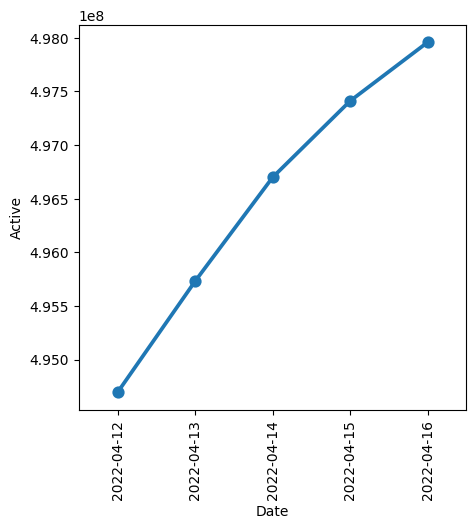

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90,fontsize=10)
# Specify 'x' and 'y' arguments for pointplot
sns.pointplot(x=total_active_cases['Date'].dt.date.tail(5), y=total_active_cases['Active'])
plt.show()

In [ ]:
#plotting worldwide confirmed cases over date using scatter plot
total_confirmed_cases = df.groupby('Date')['Confirmed'].sum().reset_index()
total_confirmed_cases.tail()

,Date,Confirmed
811,2022-04-12,500880363
812,2022-04-13,501920234
813,2022-04-14,502892186
814,2022-04-15,503606396
815,2022-04-16,504155459


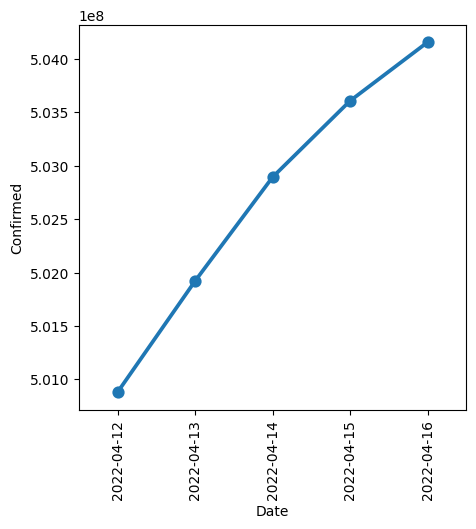

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90,fontsize=10)
# Specify 'x' and 'y' arguments for pointplot
sns.pointplot(x=total_confirmed_cases['Date'].dt.date.tail(5), y=total_confirmed_cases['Confirmed'])
plt.show()

In [ ]:
#plotting worldwide recovered cases over date using scatter plot
total_recovered_cases = df.groupby('Date')['Recovered'].sum().reset_index()
# Removed 'Date' from the list within the groupby to avoid summing datetime objects
total_recovered_cases.tail()

,Date,Recovered
811,2022-04-12,0
812,2022-04-13,0
813,2022-04-14,0
814,2022-04-15,0
815,2022-04-16,0


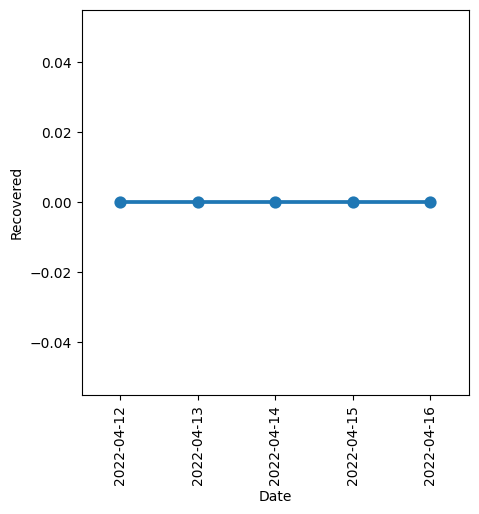

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90,fontsize=10)
# Pass 'x' and 'y' as keyword arguments
sns.pointplot(x=total_recovered_cases['Date'].dt.date.tail(5), y=total_recovered_cases['Recovered'])
plt.show()

In [ ]:
#plotting worldwide Deaths over date using scatter plot
total_deaths_cases = df.groupby('Date')[['Deaths']].sum().reset_index() # Changed ('Date','Deaths') to ['Deaths']
total_deaths_cases.tail()

,Date,Deaths
811,2022-04-12,6185040
812,2022-04-13,6189593
813,2022-04-14,6193401
814,2022-04-15,6195647
815,2022-04-16,6197159


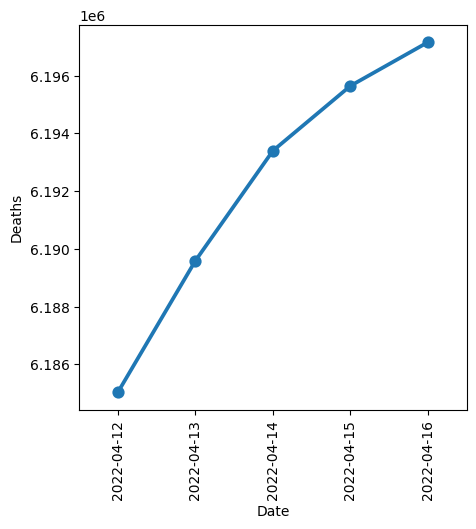

In [ ]:
plt.figure(figsize=(5,5))
plt.xticks(rotation=90,fontsize=10)
# Pass 'x' and 'y' as keyword arguments to pointplot
sns.pointplot(x=total_deaths_cases['Date'].dt.date.tail(5), y=total_deaths_cases['Deaths'])
plt.show()

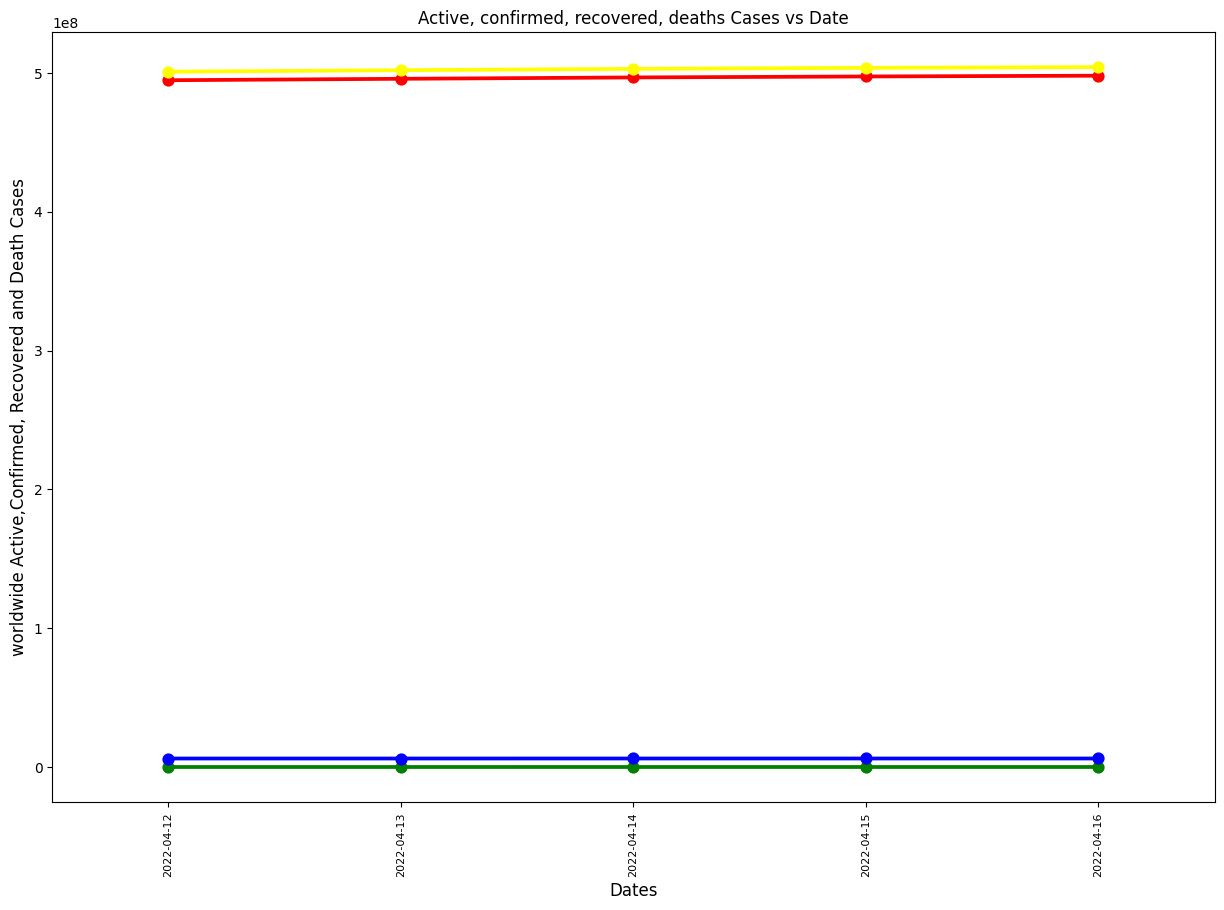

In [ ]:
# plotting worldwide active, confirmed, recovered and death cases vs date using seaborn
plt.figure(figsize=(15,10))
plt.title("Active, confirmed, recovered, deaths Cases vs Date")
plt.xticks(rotation=90,fontsize=8)
# Pass 'x' and 'y' as keyword arguments to pointplot
sns.pointplot(x=total_active_cases['Date'].dt.date.tail(5), y=total_active_cases['Active'], color='red')
sns.pointplot(x=total_confirmed_cases['Date'].dt.date.tail(5), y=total_confirmed_cases['Confirmed'], color='yellow')
sns.pointplot(x=total_recovered_cases['Date'].dt.date.tail(5), y=total_recovered_cases['Recovered'], color='green')
sns.pointplot(x=total_deaths_cases['Date'].dt.date.tail(5), y=total_deaths_cases['Deaths'], color='blue')
plt.xlabel("Dates",fontsize=12)
plt.ylabel("worldwide Active,Confirmed, Recovered and Death Cases",fontsize=12)
plt.show()

In [ ]:
#### latest date(Top) 20 Countries Having Confirmed Cases
top.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
815,2022-04-16,Afghanistan,178387,0,7676,170711
1631,2022-04-16,Albania,274462,0,3496,270966
2447,2022-04-16,Algeria,265739,0,6874,258865
3263,2022-04-16,Andorra,40709,0,153,40556
4079,2022-04-16,Angola,99194,0,1900,97294


In [ ]:
top_active = top.groupby('Country')['Active'].sum().sort_values(ascending=False).reset_index()
top_20_a = top_active.head(20)
top_20_a ### grop the data by country and sort acc. to active

,Country,Active
0,US,79636511
1,India,42520346
2,Brazil,29587892
3,France,27729110
4,Germany,23283721
5,United Kingdom,21744947
6,Russia,17435329
7,"Korea, South",16284660
8,Italy,15498233
9,Turkey,14893118


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

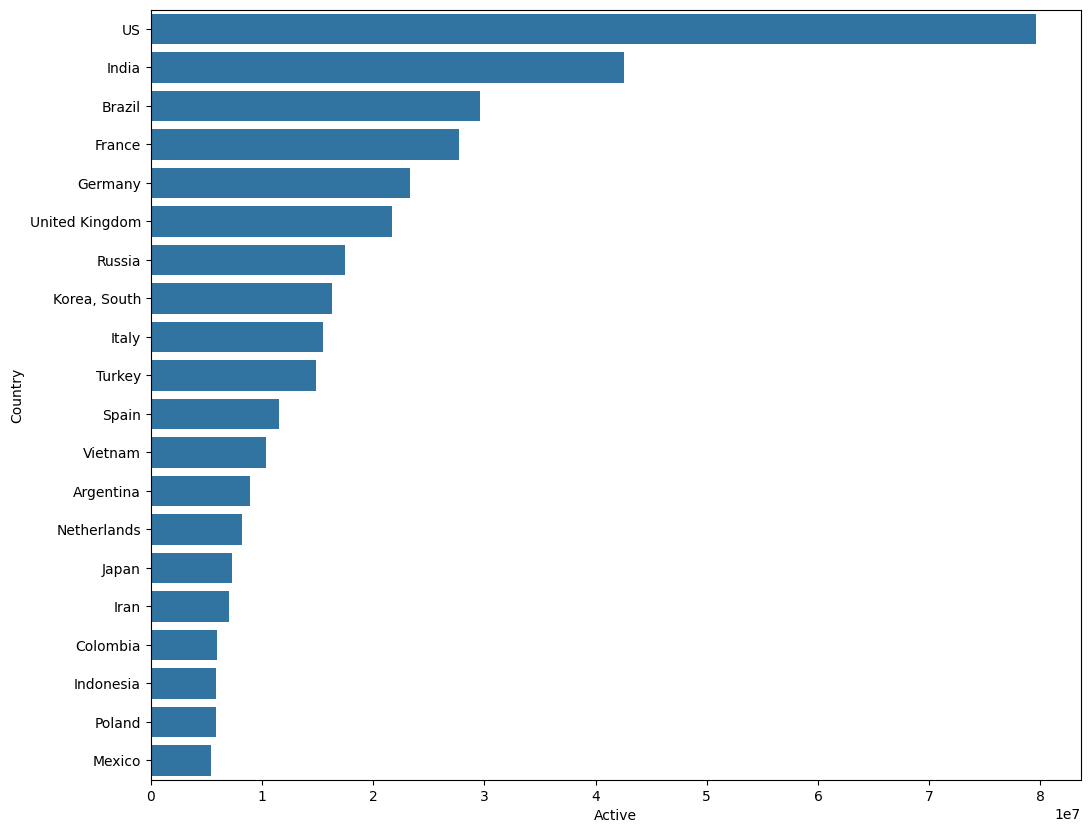

In [ ]:
plt.figure(figsize=(12,10))
# Specify 'x' and 'y' using keyword arguments
sns.barplot(x='Active', y='Country', data=top_20_a)
plt.show()

In [ ]:
top_confirmed = top.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).reset_index()
top_20_c = top_confirmed.head(20)
top_20_c ### grop the data by country and sort acc. to confirmed

,Country,Confirmed
0,US,80625120
1,India,43042097
2,Brazil,30250077
3,France,27874269
4,Germany,23416663
5,United Kingdom,21916961
6,Russia,17801103
7,"Korea, South",16305752
8,Italy,15659835
9,Turkey,14991669


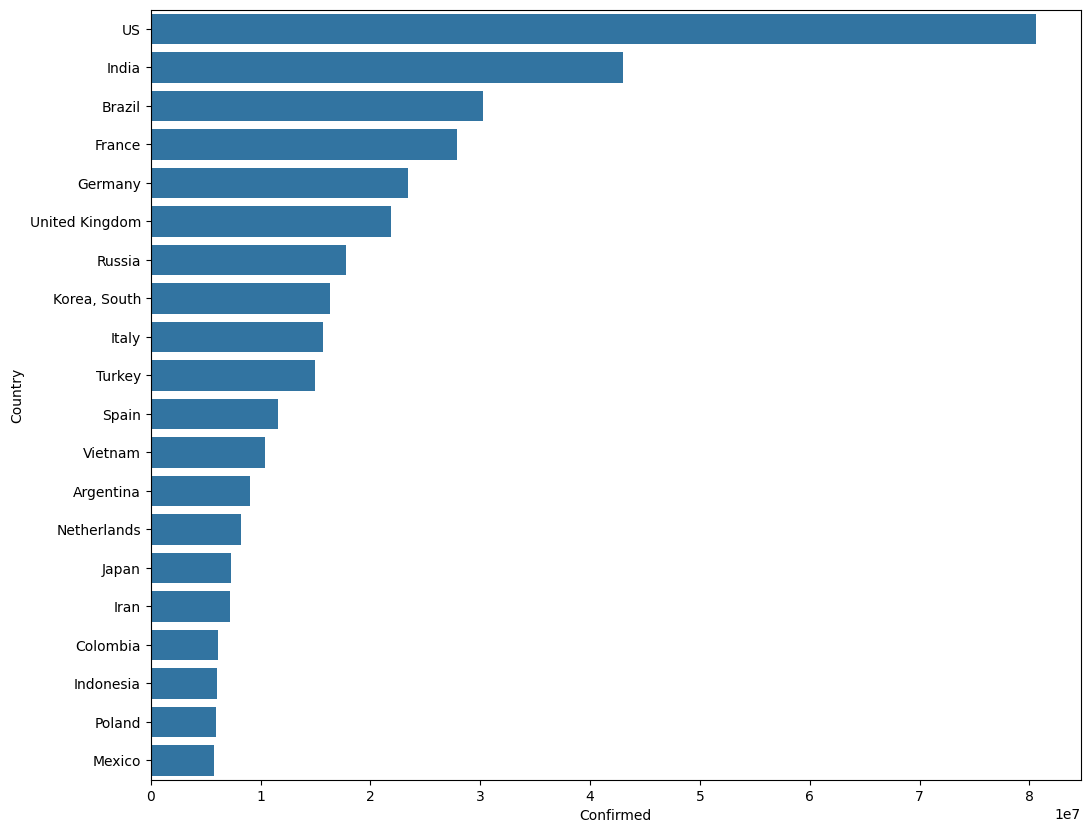

In [ ]:
plt.figure(figsize=(12,10))
# Specify 'x' and 'y' using keyword arguments
sns.barplot(x='Confirmed', y='Country', data=top_20_c)
plt.show()

In [ ]:
top_deaths= top.groupby('Country')['Deaths'].sum().sort_values(ascending=False).reset_index()
top_20_d = top_deaths.head(20)
top_20_d ### grop the data by country and sort acc. to deaths

,Country,Deaths
0,US,988609
1,Brazil,662185
2,India,521751
3,Russia,365774
4,Mexico,323938
5,Peru,212619
6,United Kingdom,172014
7,Italy,161602
8,Indonesia,155844
9,France,145159


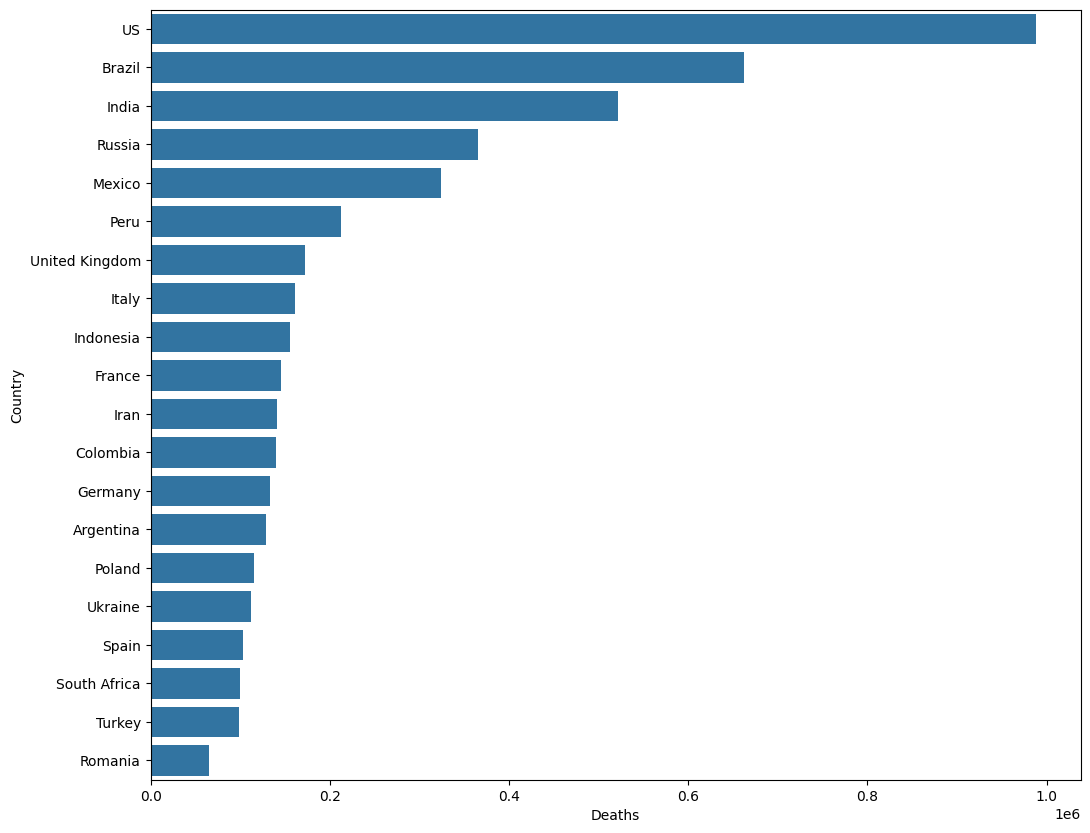

In [ ]:
plt.figure(figsize=(12,10))
# Specify 'x' and 'y' using keyword arguments
sns.barplot(x='Deaths', y='Country', data=top_20_d)
plt.show()

In [ ]:
top_recovered = top.groupby('Country')['Recovered'].sum().sort_values(ascending=False).reset_index()
top_20_r = top_recovered.head(20)
top_20_r ### grop the data by country and sort acc. to recovered

,Country,Recovered
0,Afghanistan,0
1,Namibia,0
2,Netherlands,0
3,New Zealand,0
4,Nicaragua,0
5,Niger,0
6,Nigeria,0
7,North Macedonia,0
8,Norway,0
9,Oman,0


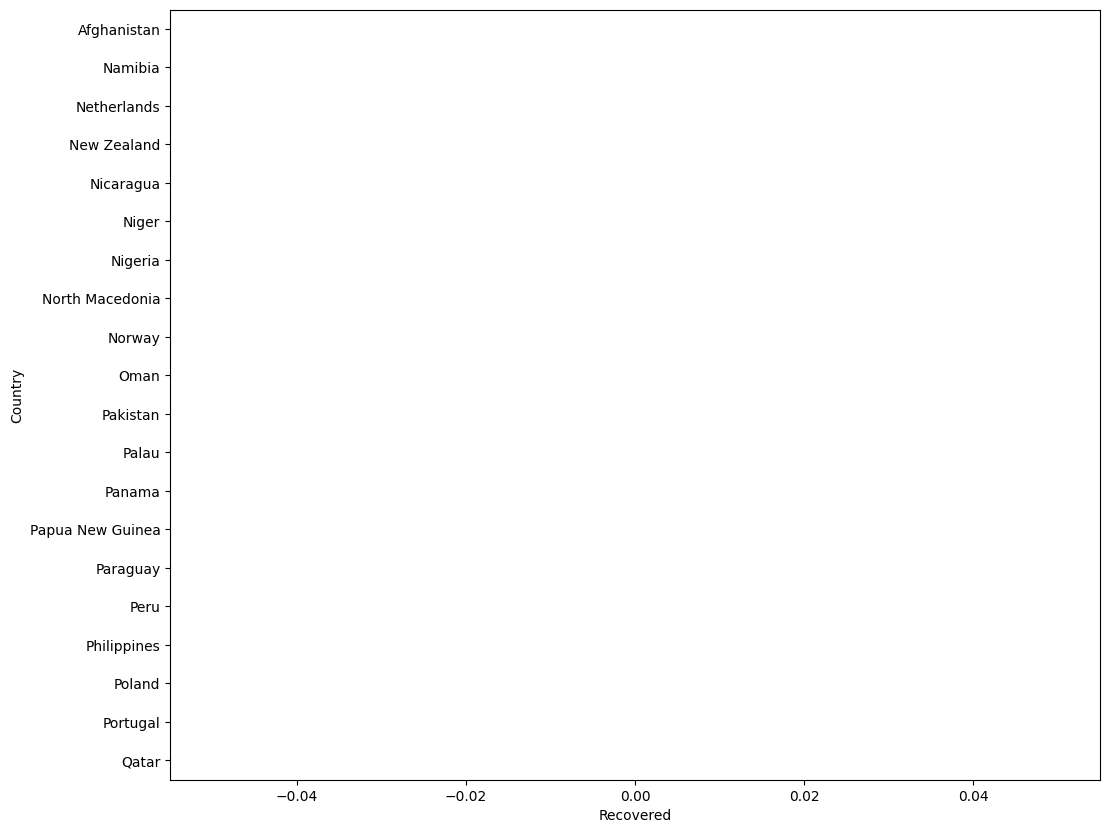

In [ ]:
plt.figure(figsize=(12,10))
# Specify 'x' and 'y' using keyword arguments
sns.barplot(x='Recovered', y='Country', data=top_20_r)
plt.show()

In [ ]:
### making dataframes for different countries

In [ ]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


In [ ]:
china = df[df['Country']=='China']
china = china.groupby('Date')[['Recovered','Active','Confirmed','Deaths']].sum().reset_index() # Changed tuple to a list
china.head()

,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,36,858,920,26
3,2020-01-25,39,1325,1406,42
4,2020-01-26,49,1970,2075,56


In [ ]:
India = df[df['Country']=='India']
India = china.groupby('Date')[['Recovered','Active','Confirmed','Deaths']].sum().reset_index() # Changed tuple to a list
India.head()

,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,36,858,920,26
3,2020-01-25,39,1325,1406,42
4,2020-01-26,49,1970,2075,56


In [ ]:
Germany = df[df['Country']=='Germany']
Germany = china.groupby('Date')[['Recovered','Active','Confirmed','Deaths']].sum().reset_index() # Changed tuple to a list
Germany.head()

,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,36,858,920,26
3,2020-01-25,39,1325,1406,42
4,2020-01-26,49,1970,2075,56


In [ ]:
US = df[df['Country']=='US']
US = china.groupby('Date')[['Recovered','Active','Confirmed','Deaths']].sum().reset_index() # Changed tuple to a list
US.head()

,Date,Recovered,Active,Confirmed,Deaths
0,2020-01-22,28,503,548,17
1,2020-01-23,30,595,643,18
2,2020-01-24,36,858,920,26
3,2020-01-25,39,1325,1406,42
4,2020-01-26,49,1970,2075,56


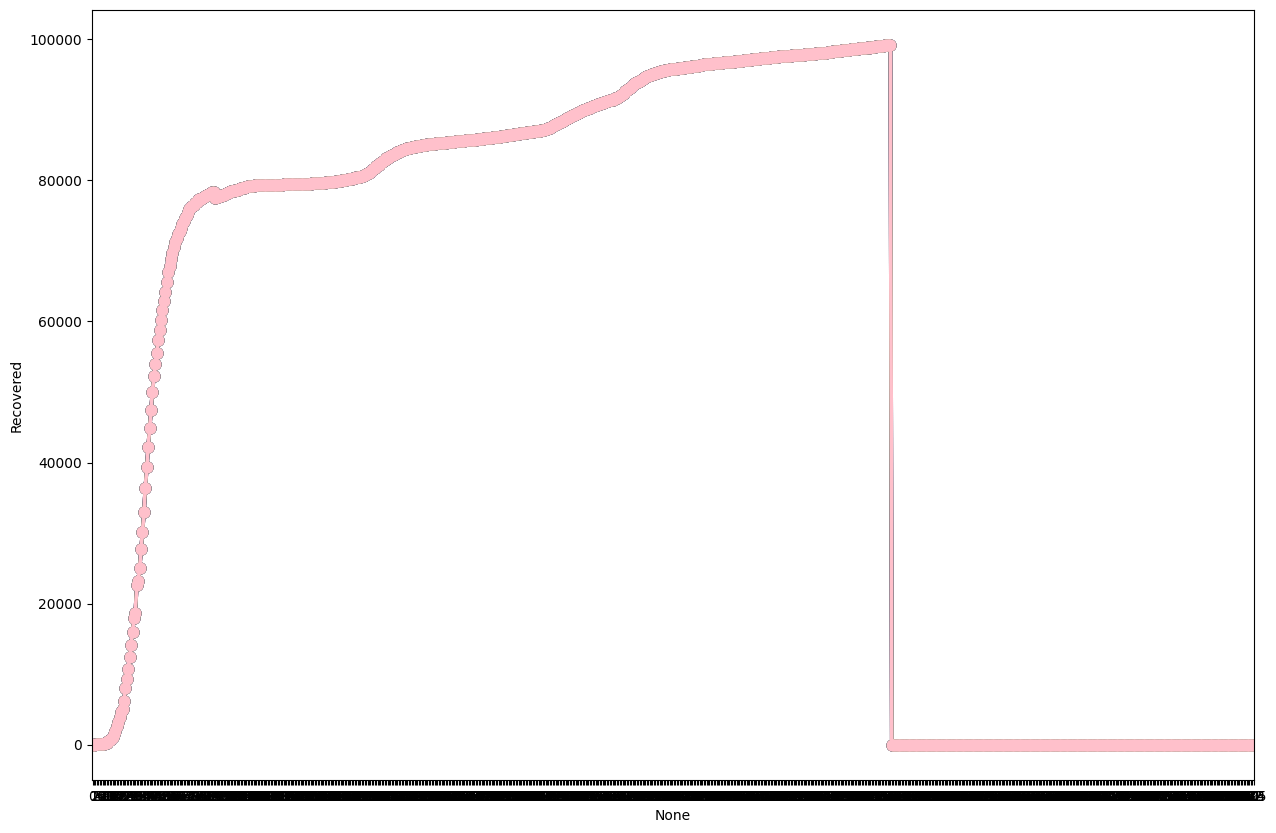

In [ ]:
plt.figure(figsize=(15,10))

# Corrected calls to sns.pointplot using keyword arguments
sns.pointplot(x=china.index, y=china['Recovered'], color='red')
sns.pointplot(x=US.index, y=US['Recovered'], color='blue')  # Use 'US' instead of 'us'
sns.pointplot(x=Germany.index, y=Germany['Recovered'], color='green')
sns.pointplot(x=India.index, y=India['Recovered'], color='pink') # Use 'India' instead of 'india'

plt.show()

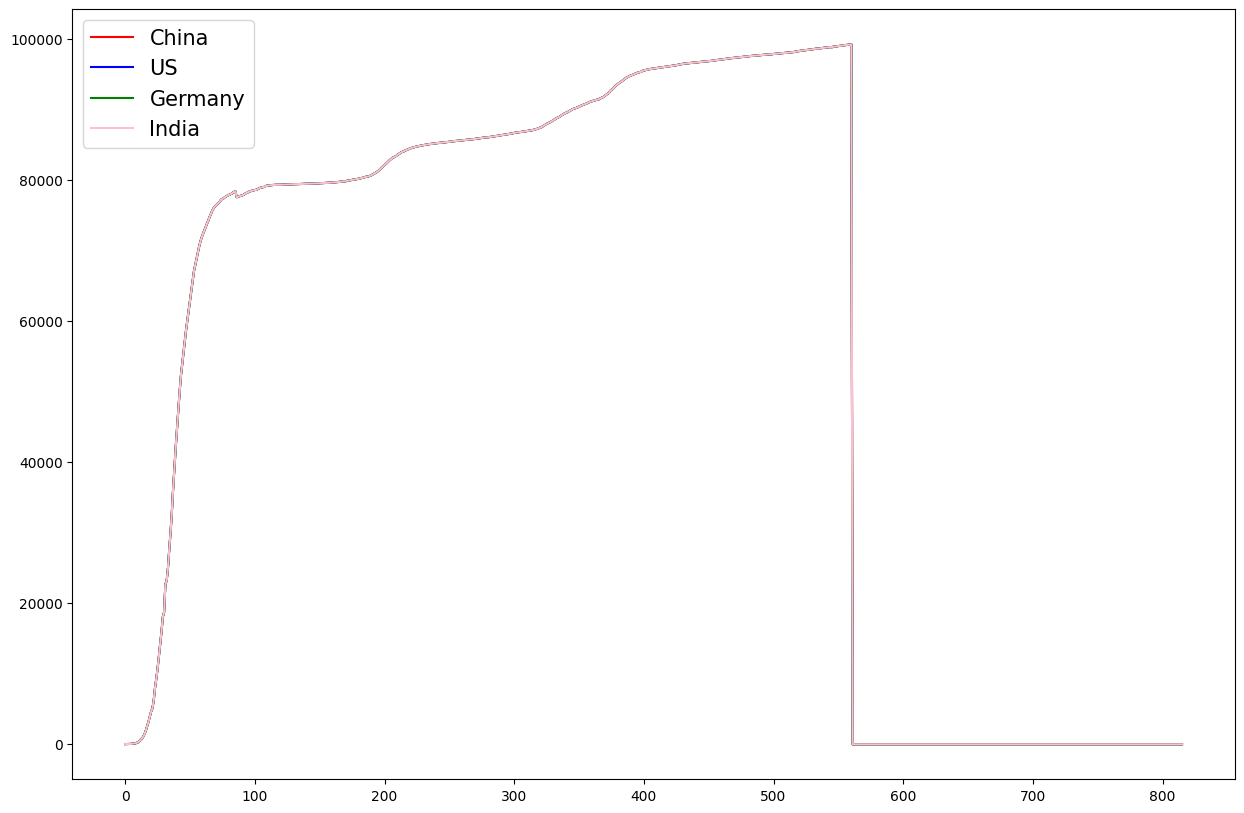

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(china.index,china['Recovered'],color='red',label="China")
plt.plot(US.index,US['Recovered'],color='blue',label='US') # Changed 'us' to 'US' to match the variable definition
plt.plot(Germany.index,Germany['Recovered'],color='green',label='Germany')
plt.plot(India.index,India['Recovered'],color='pink',label='India') # Changed 'india' to 'India' to match the variable definition
plt.legend(loc=2,fontsize=15) #legend is not present in sns
plt.show()

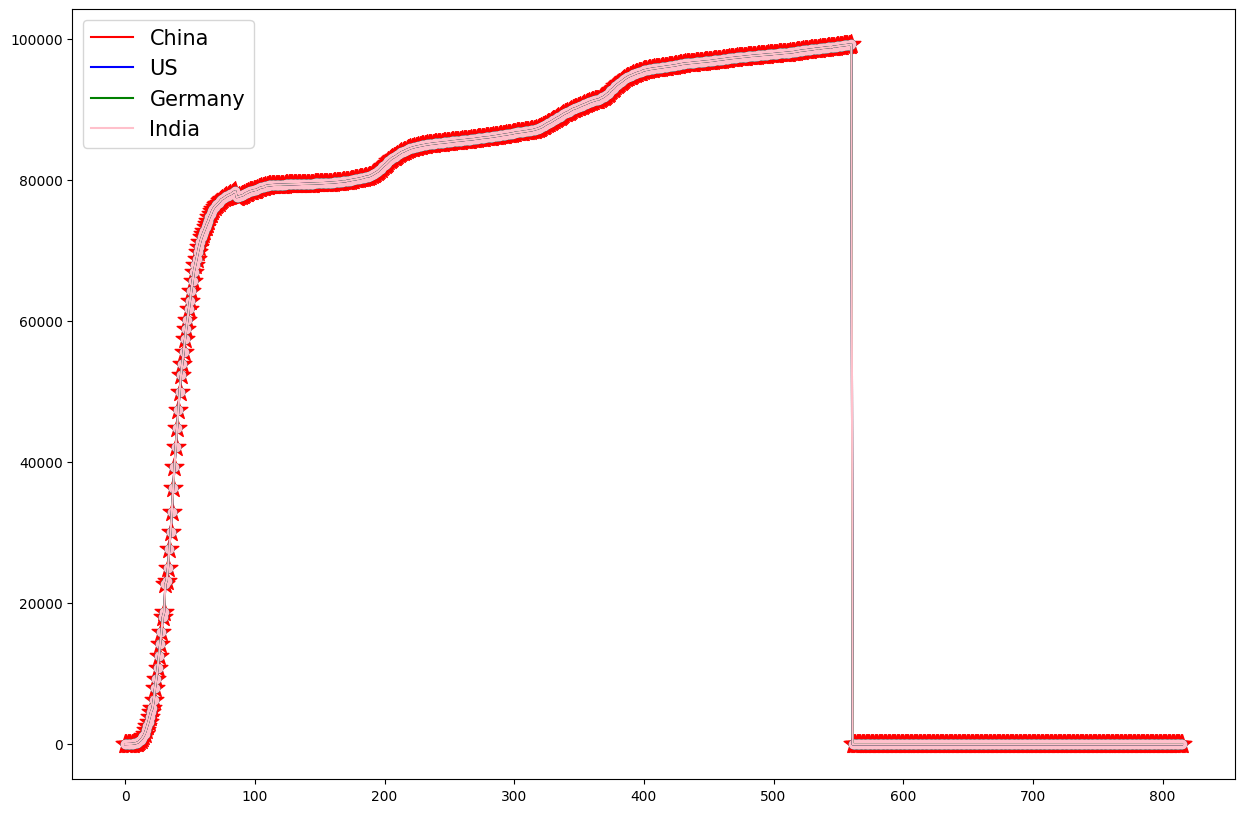

In [ ]:
plt.figure(figsize=(15,10))
plt.plot(china.index,china['Recovered'],color='red',label="China")
plt.plot(US.index,US['Recovered'],color='blue',label='US')
plt.plot(Germany.index,Germany['Recovered'],color='green',label='Germany')
plt.plot(India.index,India['Recovered'],color='pink',label='India')
plt.scatter(china.index,china['Recovered'],color='red',marker='*',s=200)
plt.scatter(US.index,US['Recovered'],color='blue')
plt.scatter(Germany.index,Germany['Recovered'],color='green')
plt.scatter(India.index,India['Recovered'],color='pink')
plt.legend(loc=2,fontsize=15)
plt.show()